In [1]:
from showit import image, tile
from regional import many
from numpy import clip, random
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from pyspark import SparkContext
sc = SparkContext()

In [4]:
from extraction.utils import make_gaussian
data, series, truth = make_gaussian(n=5, seed=42, noise=0.5, engine=sc, withparams=True)

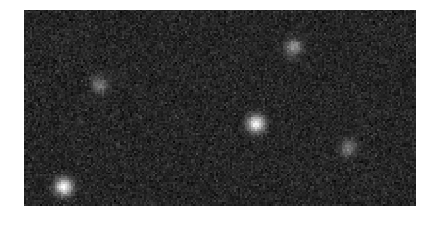

In [5]:
image(data.mean().toarray());

In [6]:
from extraction import NMF
algorithm = NMF(k=5, percentile=95, overlap=0.1)

In [7]:
model = algorithm.fit(data, block_size=(100,200))

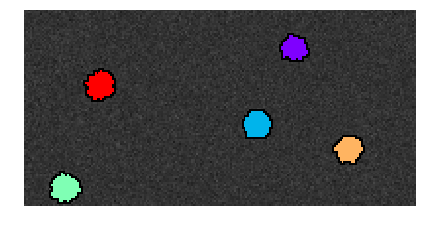

In [8]:
base = clip(data.mean().toarray(), 0, 1)
image(model.regions.mask(dims=data.shape[1:], cmap='rainbow', stroke='black', base=base));

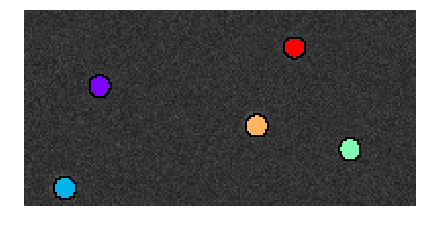

In [9]:
base = clip(data.mean().toarray(), 0, 1)
image(truth.regions.mask(dims=data.shape[1:], cmap='rainbow', stroke='black', base=base));

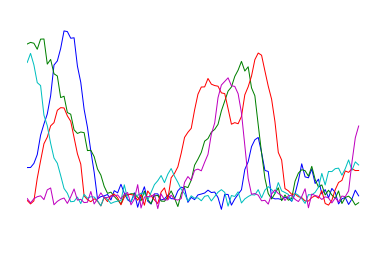

In [10]:
plt.plot(model.transform(data).toarray().T);
plt.axis('off');

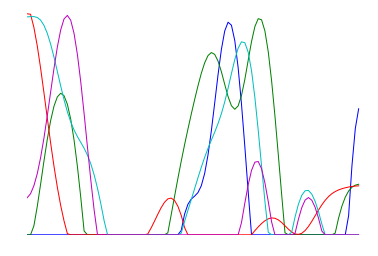

In [11]:
plt.plot(series.T);
plt.axis('off');